## Time Series Data 
**Time Series Data**
* Time series data is a sequence of data points measured at regular time intervals, typically with a temporal relationship between them. This type of data is commonly used in fields such as finance, economics, weather forecasting, and signal processing.

* A modular time series it must be <mark><i>Stationary</i></mark>.
  + A stationary time series has the following properties:
    - Constant mean over time
    - Constant variance over time
    - Constant autocorrelation over time ( How each value in the time series related to it's neighbour should stays the same.)

* In this type we will train the model with the past data and test it with the future data. 
* Chronological Order 
* Sequential Order 
* Constant Frequency 
* Dynamic Nature 

# Time Series Components: Simplified Definitions

## 1. Secular Trend
- **Meaning**: The long-term underlying direction of the data (increasing, decreasing, or stable) over years/decades
- **Example**:  
  - Gradual rise in global temperatures due to climate change  
  - Steady growth of a company's revenue over 10 years

## 2. Seasonal Variable
- **Meaning**: Predictable, repeating patterns that occur at fixed intervals (daily, monthly, yearly)
- **Example**:  
  - Higher electricity usage every summer  
  - Christmas sales spikes every December

## 3. Cyclic Variable
- **Meaning**: Fluctuations without fixed periodicity, often tied to economic conditions (>1 year duration)
- **Example**:  
  - Housing market booms and busts  
  - Business investment cycles

## 4. Irregular Variation (Noise)
- **Meaning**: Random, unpredictable fluctuations caused by unexpected events or measurement errors
- **Example**:  
  - Stock price drops due to sudden political crisis  
  - Abnormal weather affecting retail sales

### Key Differences
| Component      | Duration       | Predictability | Example |
|---------------|---------------|----------------|---------|
| **Trend**     | Years/decades | High           | Population growth |
| **Seasonal**  | Fixed periods | Very high      | Holiday sales |
| **Cyclic**    | 1+ years      | Moderate       | Recessions |
| **Irregular** | Instantaneous | None           | Natural disasters |

## Methods of Measuring Trends

### <span style="color:cyan">1. Free Hand Curve Method</span> 

#### Definition
A non-mathematical approach to trend estimation where the analyst draws a smooth curve through the data points by visual inspection.

#### Key Characteristics
- **Nature**: Subjective (relies on analyst's judgment)
- **Formula**: None (shape depends on data pattern interpretation)
- **Speed**: Quick visualization method
- **Best For**: Initial exploratory analysis

#### When to Use
1. Preliminary trend identification
2. Irregular data patterns that don't fit mathematical models
3. Visual presentations to highlight overall patterns

#### Advantages
- Requires no complex calculations
- Immediate visual representation
- Useful for small datasets

#### Limitations
- **Reproducibility**: Different analysts may draw different curves
- **Forecasting**: Cannot generate quantitative forecasts
- **Rigor**: Lacks statistical validation
- **Consistency**: Results vary between applications

#### Example Application

In [1]:
import numpy as np
import plotly.graph_objects as go
from IPython.display import HTML, display

# Generate synthetic data
np.random.seed(42)
time = np.arange(0, 24, 0.5)
y_values = np.sin(time) + np.random.normal(0, 0.2, len(time))

# Create figure
fig = go.Figure()

# Add original data
fig.add_trace(go.Scatter(
    x=time, 
    y=y_values, 
    name='Data', 
    mode='markers+lines', 
    marker_color='white', 
    line_color='orange'
))

# Add freehand trend line (manually approximated)
freehand_x = [0, 24]  # Start and end points
freehand_y = [0, 0.5]  # Manually estimated start/end values

fig.add_trace(go.Scatter(
    x=freehand_x,
    y=freehand_y,
    name='Freehand Trend',
    mode='lines',
    line=dict(color='cyan', width=4, dash='solid')
))

# Update layout
fig.update_layout(
    title='Free Hand Curve Method',
    xaxis=dict(
        title='Time', 
        zeroline=True, 
        zerolinewidth=1.5, 
        zerolinecolor='gray'
    ),
    yaxis=dict(
        title='Value', 
        zeroline=True, 
        zerolinewidth=1.5, 
        zerolinecolor='gray'
    ),
    showlegend=True,
    template='plotly_dark',
    width=1500,
    height=800  # Increased height for better scrolling
)

# Convert to scrollable HTML
html = f"""
<div style='width:100%; height:400px; overflow:auto; border:1px solid #ccc; margin:40px 0;'>
{fig.to_html(full_html=False, include_plotlyjs='cdn')}
</div>
"""
display(HTML(html))

[*********************100%***********************]  1 of 1 completed


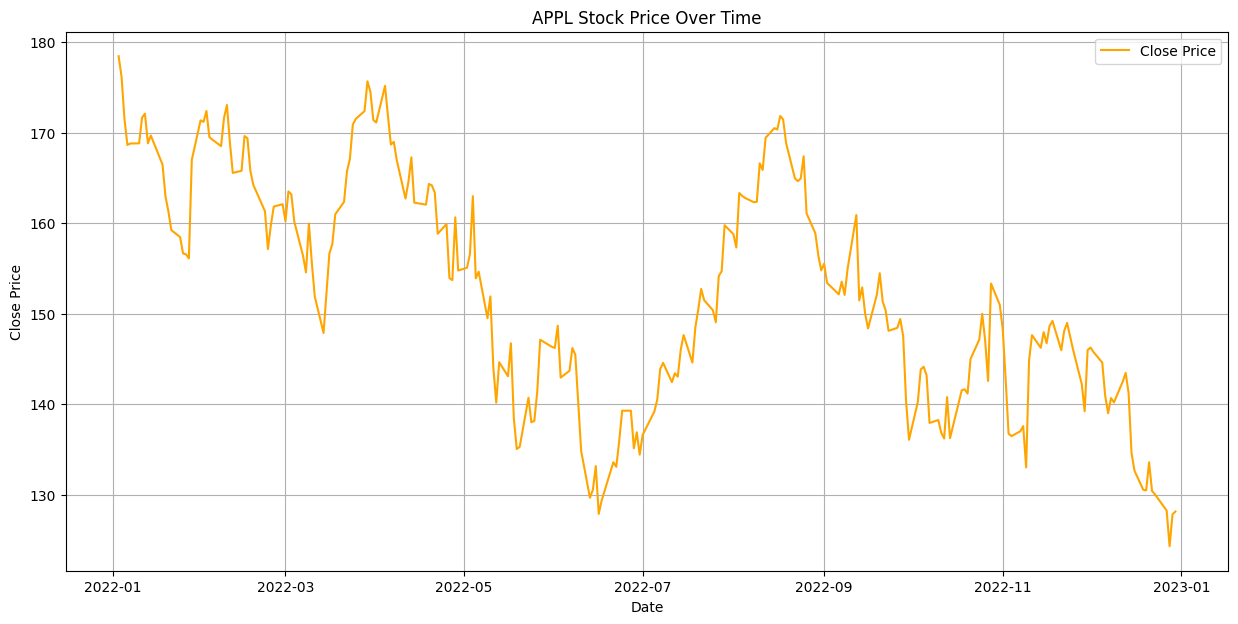

In [2]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

stock_data = yf.download("AAPL", start="2022-01-01", end="2022-12-31")

plt.figure(figsize=(15, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color = 'orange')
plt.title('APPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### <span style="color:cyan">2. Semi-Average Method</span>

#### Definition
The **semi-average method** is a simple statistical technique for trend estimation that divides time series data into two equal parts and calculates their respective averages to establish a linear trend line.

#### Key Characteristics
| Feature          | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| **Calculation**  | Divides data into two equal halves and computes their means                |
| **Complexity**   | Simple arithmetic (no advanced math required)                              |
| **Output**       | Straight-line trend connecting the two semi-averages                       |
| **Best For**     | Rough trend approximation in small datasets                                |

#### When to Use
✔️ **Appropriate for**:
- Quick preliminary trend analysis
- Small datasets (<50 observations)
- When only a rough linear trend is needed
- Situations requiring minimal computation

❌ **Avoid when**:
- Data has strong seasonality/cyclical patterns
- Non-linear trends are present
- High precision is required

#### Step-by-Step Implementation
```python
import numpy as np

# Sample data (time periods vs values)
years = np.arange(2010, 2020)
values = [12, 15, 14, 18, 20, 22, 25, 24, 27, 30]


In [3]:
import numpy as np 
import plotly.graph_objects as go

# Generate data
years = np.arange(2000, 2023)
values = np.random.randint(100, 1000, len(years))

# If the length of the data is odd then remove the middle row for calculating semi-average line
if len(years) % 2 != 0:
    middle_index = len(years) // 2
    trimmed_arr = np.delete(years, middle_index)
    
elif len(years) % 2 == 0:
    trimmed_arr = years

# Split data
first_semi_year, second_semi_year = np.array_split(trimmed_arr, 2)
first_half_values, second_half_values = np.array_split(values, 2)

# Calculate averages
avg_years = [np.mean(first_semi_year), np.mean(second_semi_year)]
avg_values = [np.mean(first_half_values), np.mean(second_half_values)]
    

# Create figure
fig = go.Figure()

# Add original data trace
fig.add_trace(go.Scatter(
    x=years, 
    y=values, 
    name='Data', 
    mode='markers+lines',
    marker=dict(color='white', size=8),
    line=dict(color='orange', width=2)
))

# Add semi-average line trace
fig.add_trace(go.Scatter(
    x=avg_years,
    y=avg_values,
    mode='lines+markers',
    name='Semi-Average Line',
    marker=dict(color='red', size=12),
    line=dict(color='cyan', width=4, dash='dash')
))

# Update layout
fig.update_layout(
    title='Semi-Average Method Demonstration',
    xaxis_title='Year',
    yaxis_title='Value',
    showlegend=True,
    template='plotly_dark',
    width=1500,
    height=800,
    hovermode='x unified'
)

fig.show()

### <span style="color:cyan">3. Moving Average Method: Explained</span>


#### Definition
A **moving average** smooths time series data by creating a series of averages from overlapping/adjacent subsets of the full dataset. It helps reveal trends by reducing noise.

#### Key Characteristics
| Feature          | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| **Calculation**  | Average of sliding window of `n` periods                                   |
| **Complexity**   | Simple arithmetic                                                          |
| **Output**       | Smoothed curve lagging behind actual data                                  |
| **Best For**     | Noise reduction, short-term trend identification                          |

#### When to Use
✔️ **Appropriate for**:
- Reducing random fluctuations in data
- Identifying underlying trends
- Preparing data for further analysis
- Smoothing volatile metrics (e.g., stock prices)

❌ **Avoid when**:
- Analyzing seasonality (use centered averages instead)
- Immediate reaction to changes is critical
- Data has structural breaks

---

#### Types of Moving Averages
1. **Simple Moving Average (SMA)**  
   ```python
   SMA_t = (y_t + y_{t-1} + ... + y_{t-n+1}) / n



In [4]:
import numpy as np
import plotly.graph_objects as go

# Generate data
years = np.arange(2000, 2023)
values = np.random.randint(100, 1000, len(years))

# Calculate moving average
gap = 4
odd_gap_ma = np.convolve(values, np.ones(gap)/gap, mode='valid')

# Create figure
fig = go.Figure()

# Add original data trace
fig.add_trace(go.Scatter(
    x=years, 
    y=values, 
    name='Data', 
    mode='markers+lines',
    marker=dict(color='white', size=8),
    line=dict(color='orange', width=2),
    hovertemplate = (
    "Year: %{x}<br>" +
    "Data: %{y:.2f}<br>" +
    "<extra></extra>"
    )
))

# Add moving average trace
fig.add_trace(go.Scatter(
    x=years[gap-1:],  # Corrected x-values for moving average
    y=odd_gap_ma,
    name='Moving Average',
    mode='lines+markers',
    marker=dict(color="#20f604", size=12),
    line=dict(color='cyan', width=4, dash='dash'),
    hovertemplate = (
    "Year: %{x}<br>" +
    "Moving Average: %{y:.2f}<br>" +
    "<extra></extra>"
    )
))

# Update layout
fig.update_layout(
    title=f'{gap} Year Moving Average Demonstration',
    xaxis_title='Year',
    yaxis_title='Value',
    showlegend=True,
    template='plotly_dark',
    width=1500,
    height=800  
)

# Show plot
fig.show()

### Definition of <mark>Trend</mark> in Time Series Data

**Trend** refers to the long-term movement or direction in a time series dataset, indicating whether values are generally increasing, decreasing, or remaining stable over an extended period.  
It represents the underlying pattern in the data after ignoring short-term fluctuations and seasonal effects.  
Trends can be **upward**, **downward**, or **flat**, and may be **linear** or **non-linear** in nature.

#### **Trend (\(T_t\))**
Estimated using a centered moving average to smooth out seasonality and noise:
\[
T_t = \frac{\sum_{i=-k}^{k} Y_{t+i}}{2k + 1}
\]
Where \( k \) = half the moving average window size.

---


### Definition of <mark>Seasonality</mark> in Time Series Data

**Seasonality** refers to the repeating patterns or fluctuations in a time series dataset that occur at regular, predictable intervals due to seasonal factors.  
These patterns are driven by recurring events such as weather changes, holidays, or economic cycles.  
Seasonality can occur over various time frames (e.g., daily, weekly, monthly, or yearly) and is characterized by consistent timing, direction, and magnitude of changes within each cycle.

#### **Seasonality (\(S_t\))**
- **Additive model**:
\[
S_t = Y_t - T_t
\]
(Then average seasonal values for each period across multiple cycles.)

- **Multiplicative model**:
\[
S_t = \frac{Y_t}{T_t}
\]
(Then average seasonal ratios for each period across multiple cycles.)

---

### Definition of Cyclic Patterns in Time Series Data

**Cyclic patterns** refer to fluctuations in a time series dataset that occur over irregular, long-term periods, often influenced by economic, business, or natural cycles.  
Unlike seasonality, cycles do not have a fixed, predictable period — their duration and magnitude can vary over time.  
Examples include business boom-and-bust cycles, housing market trends, or multi-year climate patterns.

---

**Main Difference between Cyclic and Seasonal Patterns**:
- **Seasonality** has a fixed and predictable duration (e.g., every 12 months, every 7 days), caused by recurring events.
- **Cyclic patterns** do not have a fixed duration and are influenced by broader, often irregular, economic or environmental factors.


### Definition of Residual in Time Series Data

**Residual** refers to the part of a time series that remains after removing the trend and seasonality components.  
It represents the unexplained variation in the data that cannot be attributed to systematic patterns.  
Residuals can contain both random noise and any irregular patterns not captured by the trend or seasonality.

#### **Residual (\(R_t\))**
- **Additive model**:
\[
R_t = Y_t - T_t - S_t
\]

- **Multiplicative model**:
\[
R_t = \frac{Y_t}{T_t \times S_t}
\]
---

### Definition of Noise in Time Series Data

**Noise** refers to the purely random, unpredictable variations in a time series that arise from measurement errors, random shocks, or other unpredictable influences.  
Noise has no consistent pattern and cannot be explained or forecasted using historical data.

---

**Key Difference between Residual and Noise**:
- **Residual**: The leftover part of the data after removing trend and seasonality — may include noise and other irregular effects.
- **Noise**: The completely random component within the residual, with no pattern or predictability.


In [5]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -------------------------
# Generate synthetic data
# -------------------------
np.random.seed(42)
time = np.arange(1, 50)  # 50 time points

# Trend
trend = 0.5 * time

# Seasonality
seasonality = 10 * np.sin(2 * np.pi * time / 12)

# Noise
noise = np.random.normal(0, 2, len(time))

# Additive model: Y = T + S + R
additive = trend + seasonality + noise

# Multiplicative model: Y = T × S × R
# Here seasonality is made positive to avoid negative multiplications
seasonality_mult = 1 + 0.3 * np.sin(2 * np.pi * time / 12)
multiplicative = (trend + 20) * seasonality_mult * (1 + noise / 100)

# -------------------------
# Create subplots
# -------------------------
fig = make_subplots(rows=1, cols=2, subplot_titles=("Additive Model", "Multiplicative Model"))

# Additive plot
fig.add_trace(
    go.Scatter(x=time, y=additive, mode='lines+markers', name='Additive Data', line=dict(color='blue')),
    row=1, col=1
)

# Multiplicative plot
fig.add_trace(
    go.Scatter(x=time, y=multiplicative, mode='lines+markers', name='Multiplicative Data', line=dict(color='green')),
    row=1, col=2
)

# Layout
fig.update_layout(
    title="Additive vs Multiplicative Time Series Data",
    xaxis_title="Time",
    yaxis_title="Value",
    showlegend=False,
    template="plotly_dark"
)

fig.show()


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -------------------------
# Download data from Yahoo Finance
# -------------------------
df = yf.download("AAPL", start="2023-01-01", end="2025-01-01")

# If multi-level columns, flatten them
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] for col in df.columns]

# Reset index for plotting
df = df.reset_index()

# Ensure 'Close' is a Series (1-D)
df['Close'] = df['Close'].astype(float)

# -------------------------
# Estimate trend using moving average
# -------------------------
df['Trend'] = df['Close'].rolling(window=30, center=True).mean()

# Estimate seasonality (as deviation from trend)
df['Seasonality'] = df['Close'] - df['Trend']

# Fill missing values caused by rolling window
df['Trend'] = df['Trend'].fillna(method='bfill').fillna(method='ffill')
df['Seasonality'] = df['Seasonality'].fillna(0)

# -------------------------
# Create additive model
# -------------------------
df['Additive'] = df['Trend'] + df['Seasonality']

# -------------------------
# Plot
# -------------------------
fig = make_subplots(rows=1, cols=1, subplot_titles=("Additive Model"))

# Additive plot
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Additive'], mode='lines', name='Additive Data', line=dict(color='blue')),
    row=1, col=1
)

fig.update_layout(
    title="Additive Time Series - Apple Stock",
    template="plotly_dark"
)

fig.show()


[*********************100%***********************]  1 of 1 completed


## Additive vs. Multiplicative Time Series Models

### Additive Relationship
- **Formula**:  
  `Y(t) = Trend(t) + Seasonality(t) + Residuals(t)`  
- **When to Use**:  
  - When seasonal fluctuations are **constant** over time  
  - Trend magnitude is independent of seasonality  
- **Example**:  
  `Monthly temperature variations (same ±5°C swing every year)`  

### Multiplicative Relationship
- **Formula**:  
  `Y(t) = Trend(t) * Seasonality(t) * Residuals(t)`  
- **When to Use**:  
  - When seasonal fluctuations **grow/shrink with trend**  
  - Common in economic data (e.g., sales, stock prices)  
- **Example**:  
  `Retail sales (10% holiday spikes proportional to baseline sales growth)`  

#### Key Differences
| Feature          | Additive                     | Multiplicative               |
|------------------|-----------------------------|------------------------------|
| **Seasonality**  | Constant amplitude          | Proportional to trend        |
| **Residuals**    | Additive noise              | Multiplicative noise         |
| **Transformation**| None                       | Log-transform stabilizes variance |

#### Code Example (Decomposition)
```python
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
additive = seasonal_decompose(series, model='additive')

# Multiplicative Decomposition
multiplicative = seasonal_decompose(series, model='multiplicative')

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf 
import pandas as pd 
import numpy as np
import plotly.graph_objects as go

# Download data
stock_data = yf.download("AAPL", start="2022-01-01", end="2022-12-31")

# Ensure 'Close' is a Series, not a single-column DataFrame
close_series = stock_data['Close'].squeeze()  # .squeeze() converts (N,1) -> (N,)

# Decompose the series
decomposition_additive = seasonal_decompose(close_series, model='additive', period=30)

# Get components
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

# Combine and drop NaNs
df_decomposed = pd.DataFrame({
    'Close': close_series,
    'Trend': trend_additive,
    'Seasonal': seasonal_additive,
    'Residual': residual_additive
}).dropna()

# Plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_decomposed.index,
    y=df_decomposed['Close'],
    name='Close Price',
    mode='lines',
    line=dict(color='orange')
))

fig.add_trace(go.Scatter(
    x=df_decomposed.index,
    y=df_decomposed['Trend'],
    name='Trend',
    mode='lines',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=df_decomposed.index,
    y=df_decomposed['Seasonal'],
    name='Seasonality',
    mode='lines',
    line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=df_decomposed.index,
    y=df_decomposed['Residual'],
    name='Residual',
    mode='lines',
    line=dict(color='blue')
))

fig.update_layout(
    title='AAPL Stock Price Over Time',
    xaxis_title='Date',
    yaxis_title='Close Price',
    template='plotly_dark',
    width=1500,
    height=700,
    legend=dict(orientation='h')
)

fig.show()



[*********************100%***********************]  1 of 1 completed


**LOESS Method**
================

**What is LOESS?**
----------------

LOESS (Locally Estimated Scatterplot Smoothing) is a statistical method for smoothing a scatterplot by fitting a non-parametric regression curve to the data. It is a popular method for visualizing and analyzing the relationship between two variables.

**How does LOESS work?**
----------------------

LOESS works by fitting a weighted least squares regression line to the data in a local neighborhood around each point. The weights are determined by a kernel function, which assigns more weight to points that are closer to the point of interest. The size of the neighborhood is controlled by a smoothing parameter, which determines the amount of smoothing applied to the data.

**Advantages of LOESS**
----------------------

* **Flexibility**: LOESS can handle non-linear relationships between variables.
* **Robustness**: LOESS is robust to outliers and non-normal data.
* **Interpretability**: LOESS provides a clear visual representation of the relationship between variables.

**Disadvantages of LOESS**
-----------------------

* **Computational intensity**: LOESS can be computationally intensive for large datasets.
* **Choice of smoothing parameter**: The choice of smoothing parameter can affect the results.

**Common Applications of LOESS**
------------------------------

* **Data visualization**: LOESS is often used to visualize the relationship between two variables.
* **Time series analysis**: LOESS can be used to smooth time series data.
* **Regression analysis**: LOESS can be used as a non-parametric alternative to traditional regression methods.


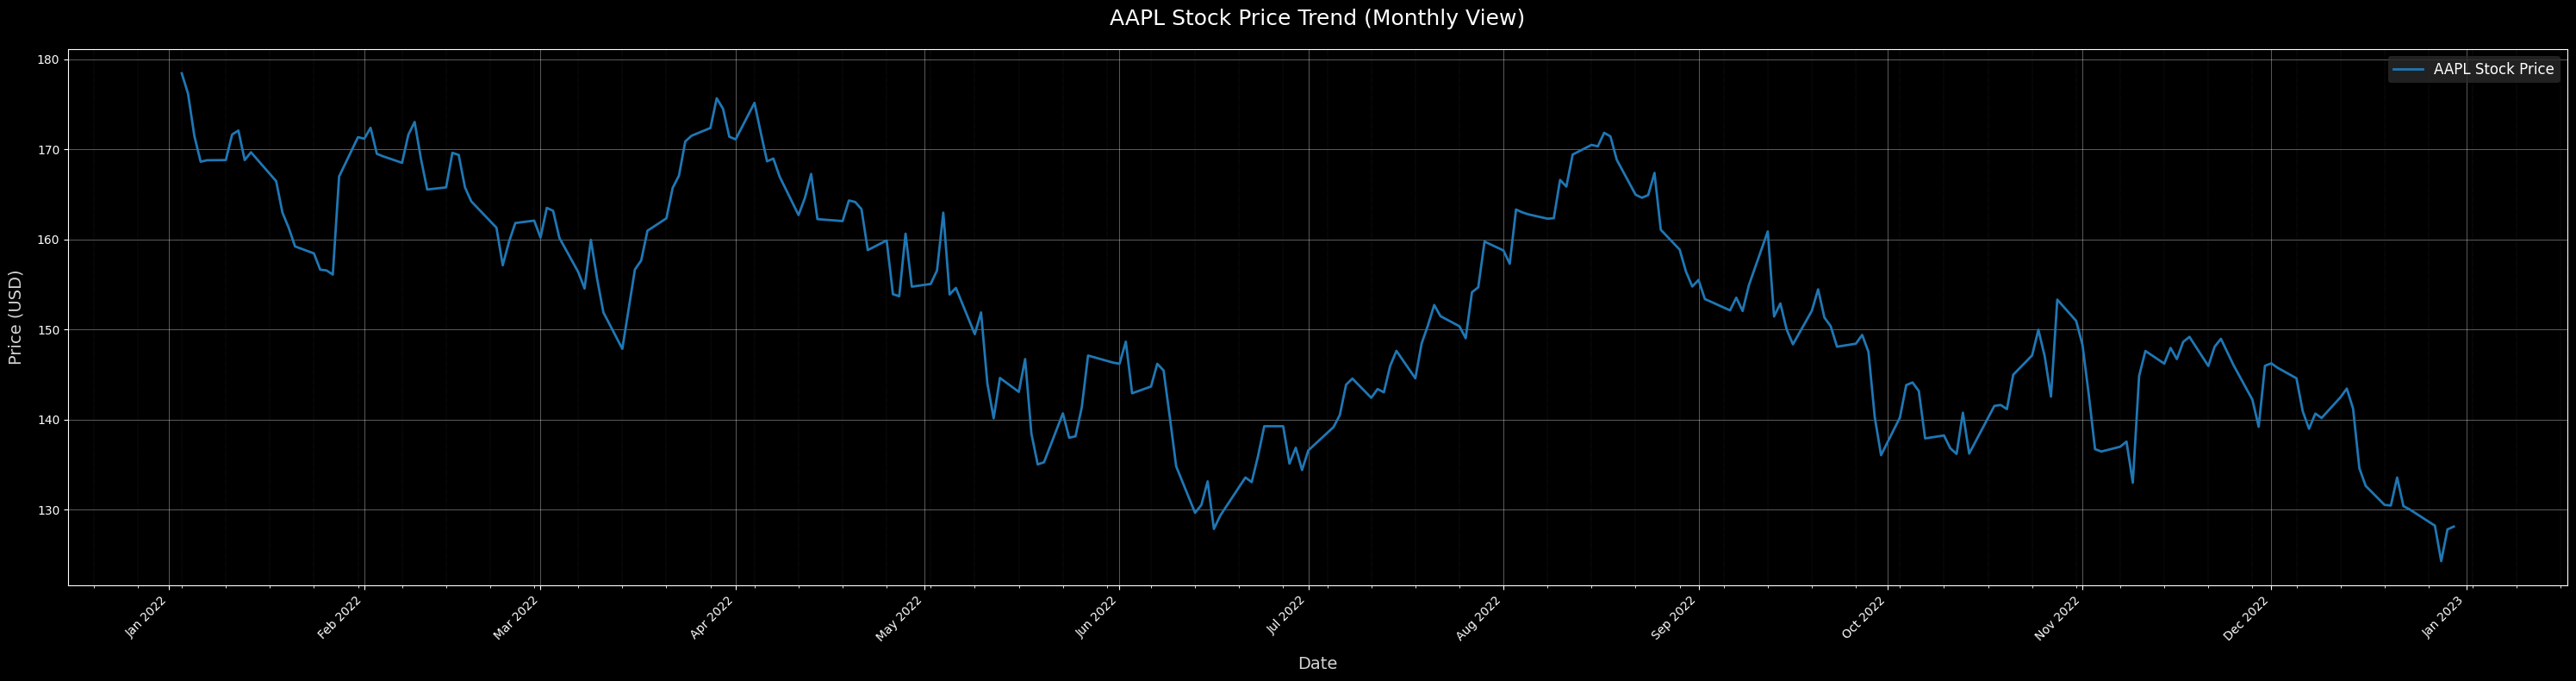

In [18]:
# Example code
from statsmodels.tsa.seasonal import STL

# Example usage:
stl = STL(stock_data['Close'], period=12)
result = stl.fit()
seasonal = result.seasonal
trend = result.trend
observed = result.observed
residual = result.resid

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

plt.style.use('dark_background')

# Create figure with wider aspect ratio
fig, ax = plt.subplots(figsize=(30, 8))  # Wider than before (30 width)

# Plot the data
ax.plot(stock_data.index, observed, 
        label='AAPL Stock Price', 
        color='#1f77b4', 
        linewidth=2)

# Configure x-axis to show all months
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Jan 2023"

# Add minor ticks for finer grid
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO))  # Minor ticks weekly

# Customize grid
ax.grid(which='major', linestyle='-', linewidth=0.5, alpha=0.5)
ax.grid(which='minor', linestyle=':', linewidth=0.3, alpha=0.3)

# Style enhancements
ax.set_title('AAPL Stock Price Trend (Monthly View)', 
            fontsize=18, pad=20, color='white')
ax.set_xlabel('Date', fontsize=14, labelpad=10, color='lightgray')
ax.set_ylabel('Price (USD)', fontsize=14, labelpad=10, color='lightgray')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')  # 45 degree rotation with right alignment

# Legend with dark theme matching
legend = ax.legend(facecolor='#2a2a2a', edgecolor='none', 
                  fontsize=12, framealpha=0.8)
plt.setp(legend.get_texts(), color='white')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Plot decomposition components
fig = make_subplots(rows=3, cols=1, subplot_titles=("Seasonal", "Trend", "Residual"))
fig.add_trace(go.Scatter(x=stock_data.index, y=seasonal, mode='lines', name='Seasonal'), row=3, col=1)
fig.add_trace(go.Scatter(x=stock_data.index, y=trend, mode='lines', name='Trend'), row=2, col=1)
#fig.add_trace(go.Scatter(x=stock_data.index, y=observed, mode='lines', name='Actual Data'), row=1, col=1)
fig.add_trace(go.Scatter(x=stock_data.index, y=residual, mode='lines', name='Residual'), row=1, col=1)
fig.update_layout(template="plotly_dark", showlegend=False, height=800, width=1600 )
fig.show()



**Checking Stationarity**
=========================

#### 1. Visual Inspection 

* **Trends**: If the mean temperature rises/falls over time → **Non-stationary**.
* **Seasonality**: Repeated patterns (e.g., daily/yearly cycles) → **Non-stationary**.

#### Your Plot Shows:

* **Variability**: Fluctuations suggest changing mean/variance.
* **Possible Seasonality**: Peaks/valleys at regular intervals (e.g., weekly/monthly).

## Augmented Dickey-Fuller (ADF) Test

## **Purpose**
The ADF test is a statistical hypothesis test used to determine whether a given **time series is stationary** (i.e., has no unit root). It is a key tool in econometrics and time series forecasting.

---

### **Null and Alternative Hypotheses**
- **Null Hypothesis (H₀):**  
  The time series has a unit root (i.e., it is **non-stationary**).
- **Alternative Hypothesis (H₁):**  
  The time series does not have a unit root (i.e., it is **stationary**).

---

### **Test Statistic and Critical Values**
- The ADF test computes a **test statistic** (e.g., `-2.73`). 
- More negative means more likely to be stationary.  
- Compare this value to **critical values** (e.g., `1%: -3.43`, `5%: -2.86`, `10%: -2.57`).  
- **Decision Rule:**  
  - If the test statistic < critical value → **Reject H₀** (series is stationary).  
  - If the test statistic > critical value → **Fail to reject H₀** (series is non-stationary).

---

### **Interpretation of p-value**
- **p-value < 0.05:** Strong evidence against H₀ (stationary).  
- **p-value ≥ 0.05:** Weak evidence against H₀ (non-stationary).

---

### **Python Implementation (using `statsmodels`)**
```python
from statsmodels.tsa.stattools import adfuller

# Example usage:
result = adfuller(time_series_data, autolag='AIC')
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")